# Plot Temperature Live Read CSV
This example uses a command line program to plot the temperature of the Xilinx Zynq chip.

The simplest way to get the internal Red Pitaya temperature is to use `xadc_get_value_temp` as described in the forum post below
https://forum.redpitaya.com/viewtopic.php?t=1078 

This command can be run repeatedly to create a graph

Get the current temperature, this is returned as a string 

In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
from datetime import datetime, date
import time
import pandas as pd

filename = str(date.today()) + " temperature data.csv"

In [2]:
headers = ["Temperature (oC)","Date"]
try:
    df = pd.read_csv(filename,names=headers,skiprows = 1)
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    df = pd.read_csv(filename, parse_dates=['Date'], date_parser=dateparse,index_col=0)
    df
except:
    df = pd.DataFrame() #Create an empty data frame to append to later
df

,Temperature (oC),Date
0,45.89,2020-05-31 19:08:38.437595
0,45.28,2020-05-31 19:08:41.400743
0,44.91,2020-05-31 19:08:43.400526
0,45.53,2020-05-31 19:08:45.401534
0,45.03,2020-05-31 19:08:47.401080
0,45.40,2020-05-31 19:08:49.406554
0,45.89,2020-05-31 19:08:51.409036
0,44.91,2020-05-31 19:08:53.408290
0,45.16,2020-05-31 19:08:55.399683
0,45.28,2020-05-31 19:08:57.405978


<IPython.core.display.Javascript object>


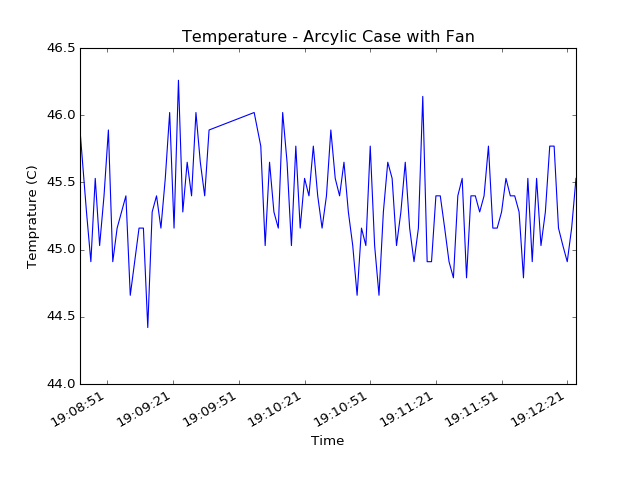

In [3]:
def animate(i):
    global df
    clean_data_table = pd.DataFrame() #Create an empty data frame to append to later
    current_temp = !xadc_get_value_temp
    temp_value = float(current_temp[0][:5])
    clear_output(wait=True)
    display('Collecting temperatures. '+ str(len(df.index)) +' value(s) recorded.')
    clean_data_table['Temperature (oC)'] = [temp_value]
    clean_data_table['Date'] = [datetime.now()]
    df = df.append(clean_data_table)
    
    x = df['Date']
    y1 = df['Temperature (oC)']
    
    plt.cla()
    plt.plot(x,y1)
    plt.xlabel('Time')
    plt.ylabel('Temprature (C)')
    plt.title("Temperature - Arcylic Case with Fan")
    plt.gcf().autofmt_xdate()
    plt.show()
    
ani = FuncAnimation(plt.gcf(), animate,interval=2000)
plt.show()

In [4]:
df[headers] #Make sure the DataFrame is in the correct order
df.to_csv(filename,names=headers)
df

,Temperature (oC),Date
0,45.89,2020-05-31 19:08:38.437595
0,45.28,2020-05-31 19:08:41.400743
0,44.91,2020-05-31 19:08:43.400526
0,45.53,2020-05-31 19:08:45.401534
0,45.03,2020-05-31 19:08:47.401080
0,45.40,2020-05-31 19:08:49.406554
0,45.89,2020-05-31 19:08:51.409036
0,44.91,2020-05-31 19:08:53.408290
0,45.16,2020-05-31 19:08:55.399683
0,45.28,2020-05-31 19:08:57.405978
